## About this Dataset

1. **id**: Unique ID for each news article  
2. **title**: The title of the article  
3. **author**: Author of the news article  
4. **text**: The text of the article (could be incomplete)  
5. **label**: A label that marks whether the news article is fake or real  
   - `0`: Real News  
   - `1`: Fake News  


Importing the libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("dataset/train.csv")

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1


In [5]:
y=df['label']

In [6]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [7]:
df.shape

(20800, 5)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [9]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
df=df.dropna()

In [11]:
messages=df.copy()

In [12]:
messages.reset_index(inplace=True)

In [13]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps=PorterStemmer()
corpus=[]
for i in range (0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('english') ]
    review=' '.join(review)
    corpus.append(review)

In [14]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [15]:
from sklearn.feature_extraction.text import  CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [16]:
X.shape

(18285, 5000)

In [17]:
y=messages['label']

In [18]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [19]:
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'absurd', 'abus', 'abus new',
       'abus new york', 'accept', 'access', 'access pipelin',
       'access pipelin protest', 'accid', 'accident'], dtype=object)

In [20]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [21]:
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names_out())

In [22]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Confusion matrix, without normalization


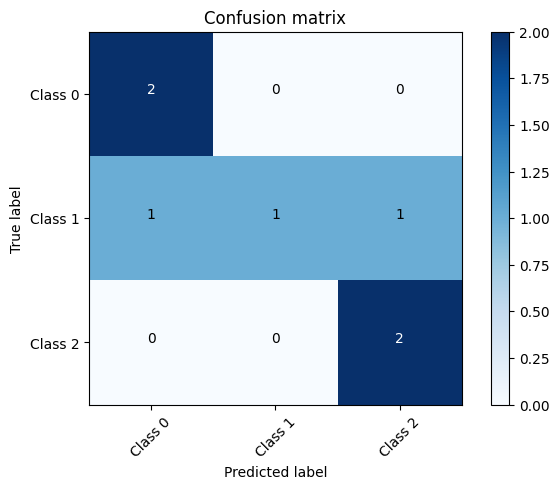

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  # This will display the plot

# Sample data for testing
y_true = [0, 1, 2, 2, 0, 1, 1]  # True labels
y_pred = [0, 0, 2, 2, 0, 2, 1]  # Predicted labels
classes = ['Class 0', 'Class 1', 'Class 2']  # Class names

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Call the plot function
plot_confusion_matrix(cm, classes, normalize=False)


In [32]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression()


In [33]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.935
Confusion matrix, without normalization


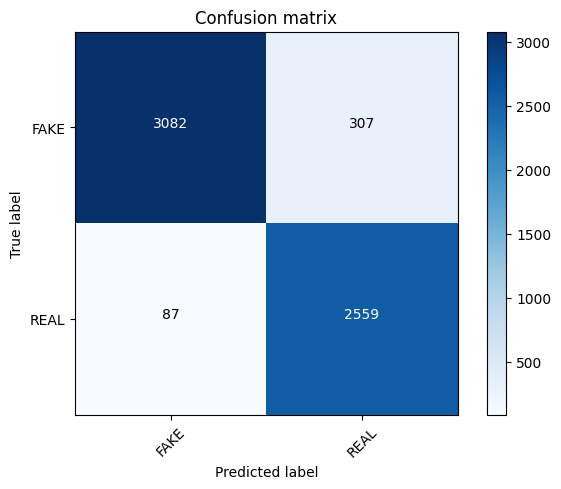

In [34]:
logistic_clf.fit(X_train, Y_train)
pred = logistic_clf.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Passive Aggressive Classfier

In [27]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Use max_iter instead of n_iter
linear_clf = PassiveAggressiveClassifier(max_iter=50)


accuracy:   0.917
Confusion matrix, without normalization


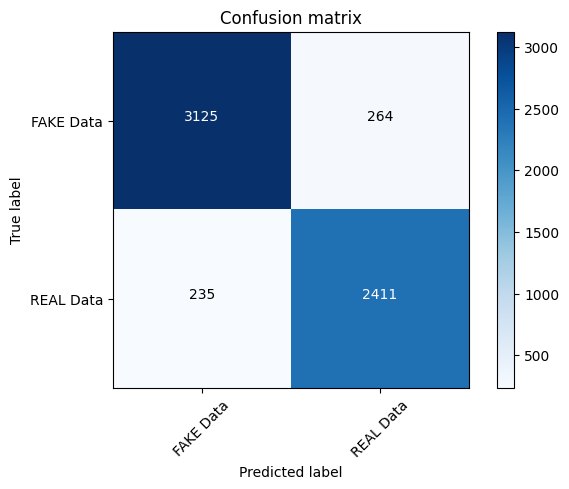

In [28]:
linear_clf.fit(X_train, Y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [37]:
import numpy as np
from scipy.special import expit  # For the sigmoid function

def predict_news(news_text: str, threshold: float = 0.7) -> str:
    """
    Predict if the news text is real or fake and show the probabilities,
    applying a threshold for classifying as FAKE using both Passive-Aggressive Classifier and Logistic Regression.
    
    Args:
        news_text (str): The text of the news to classify.
        threshold (float): The threshold for classifying the news as FAKE.
    
    Returns:
        str: "REAL" if the news is real, "FAKE" if the news is fake,
             along with the probabilities of each class from both models.
    """
    # Preprocess the input news text (e.g., vectorize the text)
    vectorized_text = cv.transform([news_text])

    # Predict using the trained Passive-Aggressive Classifier (pa)
    pa_decision_values = linear_clf.decision_function(vectorized_text)[0]
    
    # Convert decision function values to probabilities using sigmoid function
    pa_probabilities = expit(pa_decision_values)  
    
    # Predict using Logistic Regression
    logistic_prediction = logistic_clf.predict(vectorized_text)
    
    # Get the probability of FAKE using Logistic Regression
    logistic_probabilities = logistic_clf.predict_proba(vectorized_text)[0][1]  # Probability for FAKE (class 1)

    # Apply threshold for Passive-Aggressive Classifier
    pa_prediction_label = 'FAKE' if pa_probabilities > threshold else 'REAL'

    # Logistic Regression uses direct probability, so no threshold is needed
    logistic_prediction_label = 'FAKE' if logistic_prediction[0] == 1 else 'REAL'
    
    # Average the probabilities from both models for final decision
    avg_probability = (pa_probabilities + logistic_probabilities) / 2

    # Final label based on the average probability
    final_prediction_label = 'FAKE' if avg_probability > threshold else 'REAL'
    
    # Get the class labels (REAL and FAKE) and their corresponding probabilities
    classes = ['REAL', 'FAKE']
    class_probabilities_pa = [1 - pa_probabilities, pa_probabilities]  
    class_probabilities_logistic = [1 - logistic_probabilities, logistic_probabilities]  
    
    # Display the probabilities from both models
    print(f"Passive-Aggressive Classifier Probabilities: {dict(zip(classes, class_probabilities_pa))}")
    print(f"Logistic Regression Probabilities: {dict(zip(classes, class_probabilities_logistic))}")
    
    # Return the final prediction based on the average of both models
    return final_prediction_label


In [38]:
print(df['title'][0])
print(df['label'][0])
predict_news("""Why the Truth Might Get You Fired""")

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It
1
Passive-Aggressive Classifier Probabilities: {'REAL': np.float64(0.1482584016161913), 'FAKE': np.float64(0.8517415983838087)}
Logistic Regression Probabilities: {'REAL': np.float64(0.032636858664372714), 'FAKE': np.float64(0.9673631413356273)}


'FAKE'

In [ ]:
import joblib

# Assuming you have the following models and vectorizer already trained:
# - linear_clf (Passive-Aggressive Classifier)
# - classifier (Naive Bayes)
# - cv (CountVectorizer or TfidfVectorizer)

# Save the models and vectorizer to disk
joblib.dump(linear_clf, 'linear_clf.pkl')  # Save Passive-Aggressive Classifier model
joblib.dump(logistic_clf, 'logistic_clf.pkl')  # Save Logistic Regression model
joblib.dump(cv, 'vectorizer.pkl')  # Save the vectorizer (CountVectorizer or TfidfVectorizer)


['vectorizer.pkl']